# Extracting and Visualizing Stock Data
## Description
Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, we will extract Tesla and Game Stop stock data, I will then display this data in a graph.

In [1]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.5/939.5 kB 56.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.1/101.1 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 115.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 119.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 111.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 33.9 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.7-py3-none-any.whl size=138905 sha256=fa46a26179ae16f73c9a4fc9aab2617

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define Graphing Function
In this section, We define the function make_graph. 

In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

# Question 1 - Extracting Tesla Stock Data Using yfinance


In [4]:
tesla=yf.Ticker("TSLA")

Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. Set the period parameter to max so we get information for the maximum amount of time.

In [5]:
tesla_data=tesla.history(period="max")

__Reset the index__ using the reset_index(inplace=True) function on the tesla_data DataFrame and display the first five rows of the tesla_data dataframe using the head function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.

In [6]:
tesla_data.reset_index(inplace=True)
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2 - Extracting Tesla Revenue Data Using Webscraping
Use the requests library to download the webpage https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue. Save the text of the response as a variable named html_data.

In [7]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

Parse the html data using beautiful_soup

In [8]:
soup = BeautifulSoup(html_data)

Using BeautifulSoup or the read_html function extract the table with Tesla Quarterly Revenue and store it into a dataframe named tesla_revenue. The dataframe should have columns Date and Revenue.

In [26]:
data = []
for table in soup.find_all("table"):
    
    if any(["Tesla Quarterly Revenue".lower() in th.text.lower() for th in table.find_all("th")]):
        for row in table.find("tbody").find_all("tr"):
            date_col, rev_col = [col for col in row.find_all("td")]
            data.append({
                "Date": date_col.text,
                "Revenue": rev_col.text
            })

tesla_revenue = pd.DataFrame(data)

In [52]:
tesla_revenue

,Date,Revenue
0,2024-09-30,25182.0
1,2024-06-30,25500.0
2,2024-03-31,21301.0
3,2023-12-31,25167.0
4,2023-09-30,23350.0
...,...,...
56,2010-09-30,31.0
57,2010-06-30,28.0
58,2010-03-31,21.0
60,2009-09-30,46.0


Execute the following lines to remove an null or empty strings in the Revenue column

tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [35]:
tesla_revenue.tail(5)

,Date,Revenue
56,2010-09-30,31.0
57,2010-06-30,28.0
58,2010-03-31,21.0
60,2009-09-30,46.0
61,2009-06-30,27.0


# Question 3 - Extracting GameStop Stock Data Using yfinance


Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is GME.

In [37]:
gme = yf.Ticker("GME")

Using the ticker object and the function history extract stock information and save it in a dataframe named gme_data. Set the period parameter to max so we get information for the maximum amount of time.

In [39]:
gme_data = gme.history(period="max")

__Reset the index__ using the reset_index(inplace=True) function on the gme_data DataFrame and display the first five rows of the gme_data dataframe using the head function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.

In [41]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4 - Extracting GameStop Revenue Data Using Webscraping

se the requests library to download the webpage https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue. Save the text of the response as a variable named html_data.

In [45]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

Parse the html data using beautiful_soup.

In [46]:
soup = BeautifulSoup(html_data)

In [47]:
data = []
for table in soup.find_all("table"):
    
    if any(["GameStop Quarterly Revenue".lower() in th.text.lower() for th in table.find_all("th")]):
        for row in table.find("tbody").find_all("tr"):
            date_col, rev_col = [col for col in row.find_all("td")]
            data.append({
                "Date": date_col.text,
                "Revenue": rev_col.text.replace("$", "").replace(",", "")
            })

gme_revenue = pd.DataFrame(data)

In [53]:
gme_revenue

,Date,Revenue
0,2024-07-31,798.0
1,2024-04-30,882.0
2,2024-01-31,1794.0
3,2023-10-31,1078.0
4,2023-07-31,1164.0
...,...,...
58,2010-01-31,3524.0
59,2009-10-31,1835.0
60,2009-07-31,1739.0
61,2009-04-30,1981.0


In [51]:
gme_revenue.tail()

,Date,Revenue
58,2010-01-31,3524.0
59,2009-10-31,1835.0
60,2009-07-31,1739.0
61,2009-04-30,1981.0
62,2009-01-31,3492.0


# Question 5 - Tesla Stock and Revenue Dashboard

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the make_graph function is make_graph(tesla_data, tesla_revenue, 'Tesla')

/tmp/ipykernel_178/2068038883.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_178/2068038883.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



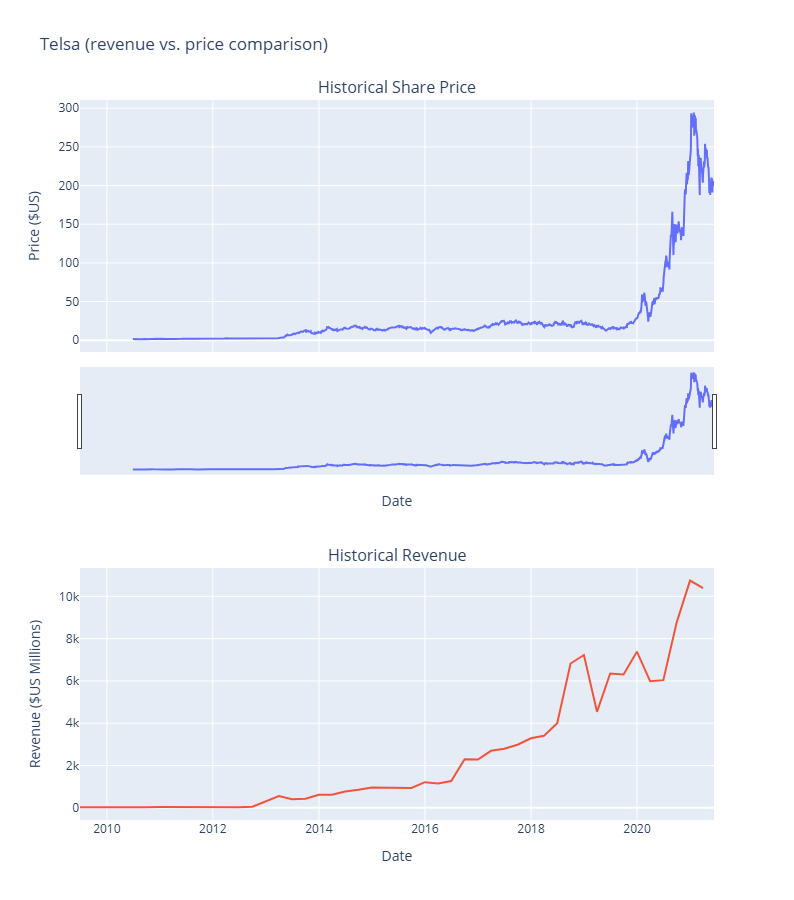

In [55]:
make_graph(tesla_data, tesla_revenue, 'Telsa (revenue vs. price comparison)')

# Question 6 - GameStop Stock and Revenue Dashboard

/tmp/ipykernel_178/2068038883.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_178/2068038883.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



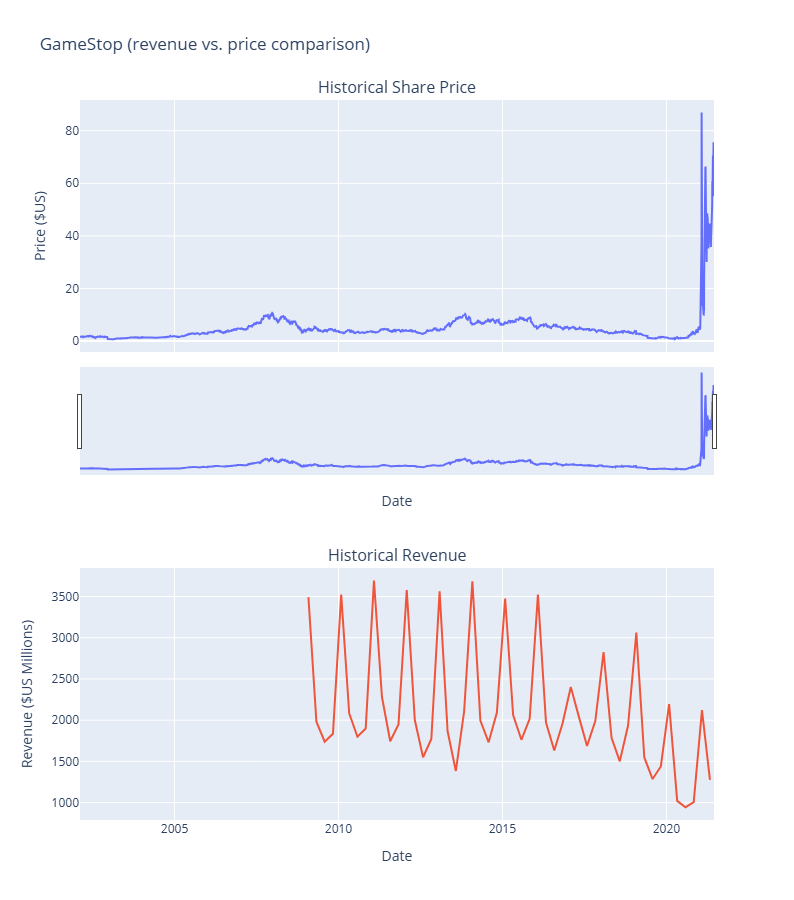

In [56]:
make_graph(gme_data, gme_revenue, 'GameStop (revenue vs. price comparison)')